In [4]:
import os
from pathlib import Path
from utils import data_loader_utils
import itertools 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import math
from scipy import ndimage

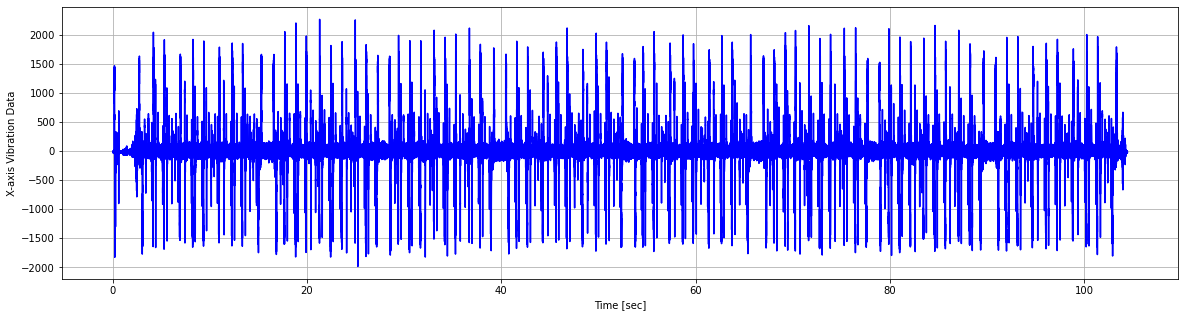

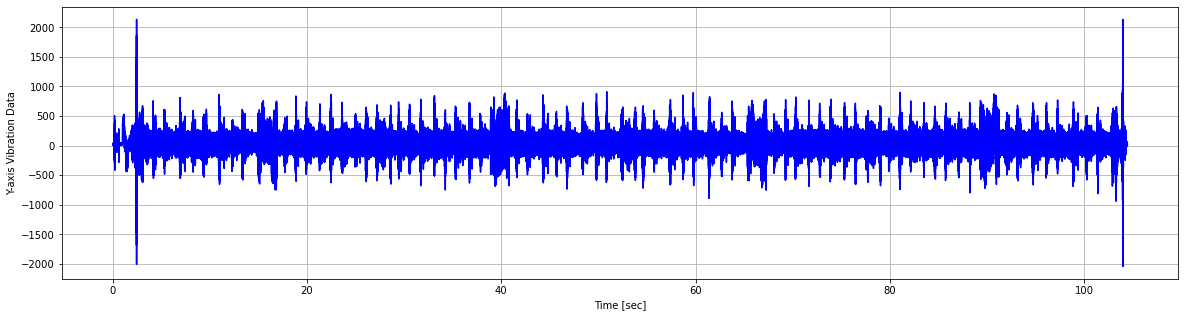

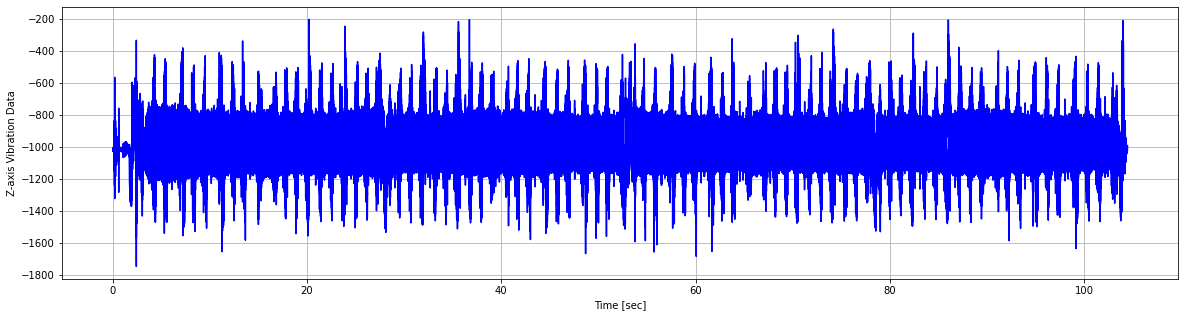

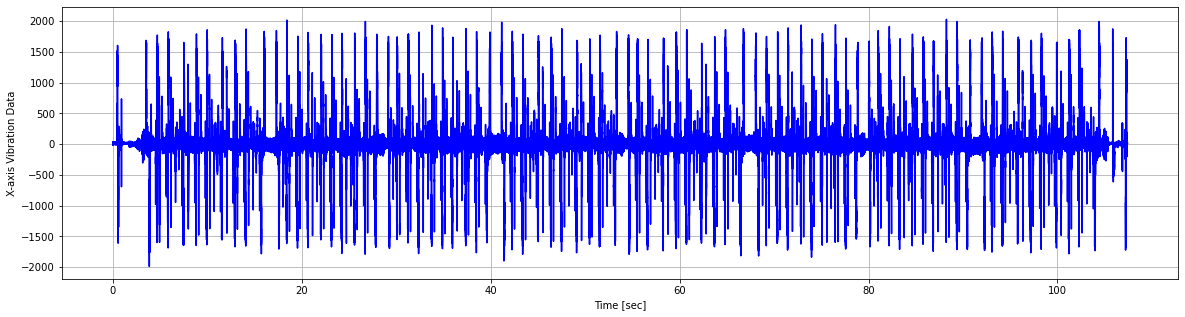

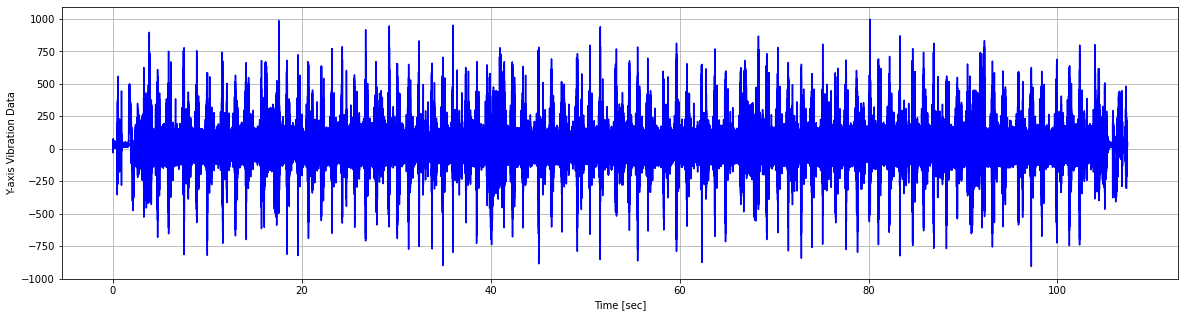

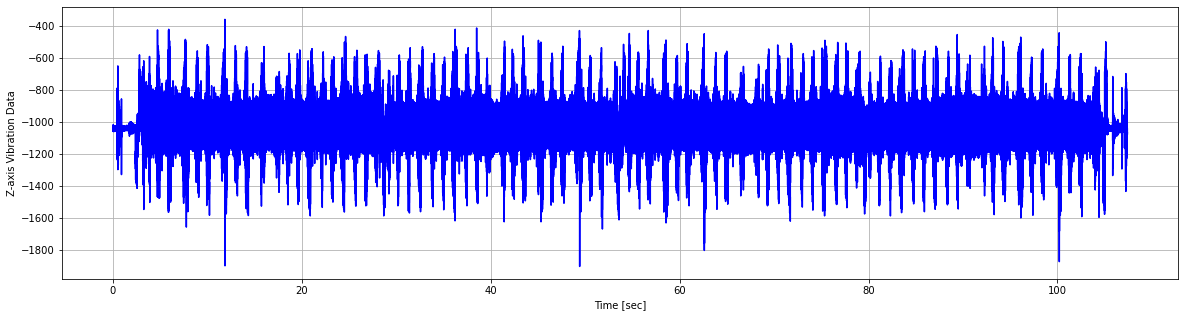

In [5]:
file1 = Path("./data/M01/OP09/good/M01_Aug_2019_OP09_000.h5").absolute()
file2 = Path("./data/M01/OP09/good/M01_Feb_2019_OP09_000.h5").absolute()
x = data_loader_utils.datafile_read(file1)
y = data_loader_utils.datafile_read(file2)

In [6]:
# Define a function to calculate mean
def mean(arr):
    return sum(arr) / len(arr)
# function to calculate cross-correlation
def cross_correlation(x, y):
    # Calculate means
    x_mean = mean(x)
    y_mean = mean(y)
    
    # Calculate numerator
    numerator = sum((a - x_mean) * (b - y_mean) for a, b in zip(x, y))
    
    # Calculate denominators
    x_sq_diff = sum((a - x_mean) ** 2 for a in x)
    y_sq_diff = sum((b - y_mean) ** 2 for b in y)
    denominator = math.sqrt(x_sq_diff * y_sq_diff)
    correlation = numerator / denominator
    
    return correlation

In [7]:
print(x.shape)
print(y.shape)
print(len(y))
print(np.mean(x[:,0]))


(208896, 3)
(214800, 3)
214800
-4.115789675245098


In [8]:
correlation = cross_correlation(x[:,0], y[0:len(x),0])
print('Correlation:', correlation)

Correlation: 0.00024677840442600415


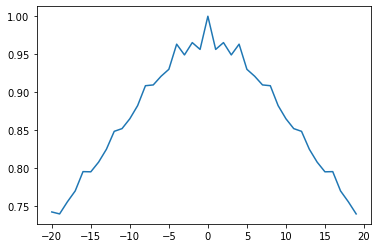

In [9]:
delay_range = range(-20, 20, 1)
cross_corr = np.zeros((len(delay_range),1))
for i in range(0, len(delay_range), 1):
    x_i = x[0:min(len(x),len(y)), 0]
    y_i = ndimage.shift(x[0:min(len(x),len(y)), 0], delay_range[i])
    cross_corr[i] = np.corrcoef(x_i,y_i)[0,1]
plt.plot(delay_range, cross_corr[:])
plt.show()